# はじめに

SymPy を使って全微分をしてみたかったのですが，
それらしい記事が見つからなかったため試行錯誤してやってみることにしました。

# 設定

## インテリセンスの有効化

Jupyter Notebook ではデフォルトでインテリセンスが有効になっておらず，不便なため有効化します。


In [231]:
%config IPCompleter.greedy=True

# 使用するパッケージなど

## SymPy

数式を扱うので当該パッケージを使用します。
init_printing は，数式を表示する際に使うようですが，よくわからないです(´・ω・｀)

In [232]:
import sympy
from sympy import plot, init_printing, var, symbols, Eq, Function, Symbol, simplify, expand, collect

init_printing()

## その他

- operator … 演算子
- functools … リストを操作する際に使用
- reduce … 総和とか総乗に使用


In [233]:
from operator import add
from functools import reduce

# 変数の定義

使用する変数を定義します。
一部しか使わないのですが，とりあえず a ～ z を対象にします。

In [234]:
var("a:z")

# 関数の定義

全微分する関数を定義します。

左辺は別に関数として定義しなくても良いのですが，
なんとなくそれっぽい見た目にしたかったためですね(´・ω・｀)

In [235]:
# 関数の左辺を定義する
f = sympy.symbols("f", cls = Function)
f = f(x, y, z)
f_l_ = f

## 関数の右辺を定義する
f_r_ = 4 * x ** (1 / 4) + x ** 2 * y + y ** 3 - 7 * z ** 6

# 関数を定義する
f_ = sympy.Eq(f_l_, f_r_)
f_

定義できましたね。

本当は指数を分数で表示したいところですが，
本題ではないのでそのままにします。

# 全微分する

## 対象の関数に使われている変数をリスト化する

全微分する対象の関数の右辺に登場する変数をリスト化します。
ついでに，微分記号とくっついた変数も定義します。

In [236]:
sym_list = list(f_.rhs.atoms(Symbol))
[var(str(d) + str(li)) for li in sym_list]

## 偏微分して結果を足し合わせる

作成した変数のリストに含まれる変数の分だけ偏微分し，
微分記号のついた変数を掛けたものを加算します。

また，今回は左辺が関数だけなので右辺だけ全微分し，
左辺は微分記号 d を付けるだけにします。
※この点については後で触れます。

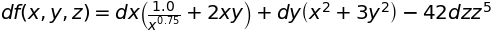

In [237]:
rdf_ = [(sympy.diff(f_.rhs, li)) * sympy.symbols(str(d) + str(li)) for li in sym_list]
df_ = sympy.Eq(d * f, reduce(add, [li for li in rdf_]))
df_

# ちょっと遊んでみる

## dz = 0 を求める

全微分した関数に対し，dz = 0 を代入します。

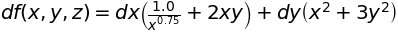

In [238]:
dg_ = sympy.Eq(df_.lhs, df_.rhs.subs(dz, 0))
dg_

それだけです(´・ω・｀)

## 両辺を dx で割ってみる

両辺を dx で割ります。

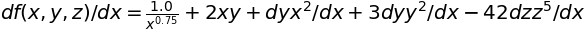

In [239]:
dh_ = sympy.expand(sympy.Eq(df_.lhs / dx, df_.rhs / dx))
dh_

結果を見やすく変形します。

- expand … 式を展開する関数
- collect … 指定した変数で括り出す関数
- coeff … 係数を指定すると項の残りの部分を返す関数


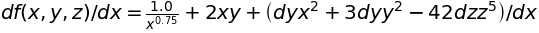

In [240]:
dh_ = sympy.Eq(dh_.lhs.collect(dx), dh_.rhs.collect(dx))
dh_

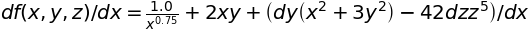

In [241]:
tmp = dh_.rhs.coeff(1/dx)
di_ = dh_.subs(tmp, tmp.collect(dy))
di_

以上です(´・ω・｀)


# おわりに

本稿の残された課題として，それっぽい微分を右辺だけやった点が挙げられます。

左辺を f(x, y, z) という形式で定義してしまったため，
それっぽいやり方できれいに微分することができず，
無理やり微分記号 d をくっつけるやり方になってしまいました。

今後 SymPy を使っていく中で何かわかったらまた更新したいと思います。
